In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

生成数据集

In [5]:
def synthetic_data(w,b,num_examples):
    """生成y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))   #生成正态分布是吗？？？
    y = torch.matmul(X,w) + b      # X * w  + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))     # y.reshape((-1,1))将数据转化为1列？？ 

In [10]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

In [11]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([1.9257, 0.8205]) 
label: tensor([5.2597])


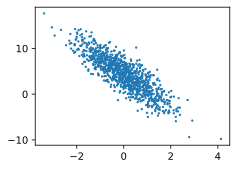

In [19]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),2)

In [ ]:
def data_iter(batch_size,features,labels):    # 接受 批量大小 (一次训练所抓取的样本的数量)，特征矩阵，标签的向量
    num_examples = len(features)
    indices= list(range(num_examples))        # 获取下表的列表
    # 做到随机读取
    random.shuffle(indices)                   # 将这个list中的元素打乱
    for i in range(0,num_examples,batch_size):   
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]


In [20]:
batch_size = 10    #设置批量的大小


[0, 1, 2, 3, 4, 5, 6, 7, 8]